In [ ]:
#Question-1

In [1]:
import numpy as np



In [2]:
np.random.seed(0)

In [3]:
array = np.random.randint(10, 101, (5, 5))
print("Original Array:\n", array)


Original Array:
 [[54 57 74 77 77]
 [19 93 31 46 97]
 [80 98 98 22 68]
 [75 49 97 56 98]
 [91 47 35 87 82]]


In [9]:
array = np.random.randint(10, 101, size=(5, 5))
print("Original 5x5 Array:\n", array)

Original 5x5 Array:
 [[19 30 90 79 89]
 [57 74 92 98 59]
 [39 29 29 24 49]
 [42 75 19 67 42]
 [41 84 33 45 85]]


In [10]:
modified_array = np.where(array % 2 == 0, -1, array)
print("\nArray with Even Numbers Replaced by -1:\n", modified_array)



Array with Even Numbers Replaced by -1:
 [[19 -1 -1 79 89]
 [57 -1 -1 -1 59]
 [39 29 29 -1 49]
 [-1 75 19 67 -1]
 [41 -1 33 45 85]]


In [11]:
row_sum = modified_array.sum(axis=1)
row_mean = modified_array.mean(axis=1)
print("\nRow-wise Sum:", row_sum)
print("Row-wise Mean:", row_mean)



Row-wise Sum: [185 113 145 159 203]
Row-wise Mean: [37.  22.6 29.  31.8 40.6]


In [12]:
col_sum = modified_array.sum(axis=0)
col_mean = modified_array.mean(axis=0)
print("\nColumn-wise Sum:", col_sum)
print("Column-wise Mean:", col_mean)


Column-wise Sum: [155 101  79 189 281]
Column-wise Mean: [31.  20.2 15.8 37.8 56.2]


In [13]:
flattened_sorted = np.sort(modified_array.flatten())[::-1]
print("\nFlattened and Sorted (Descending):\n", flattened_sorted)


Flattened and Sorted (Descending):
 [89 85 79 75 67 59 57 49 45 41 39 33 29 29 19 19 -1 -1 -1 -1 -1 -1 -1 -1
 -1]


In [ ]:
#Question-2


In [31]:
import pandas as pd
df = pd.read_csv('StudentsPerformance.csv')


In [32]:
stats = df[['math score', 'reading score', 'writing score']].agg(['mean', 'median', 'std'])
print("Basic Statistics (Mean, Median, Std):\n", stats)

Basic Statistics (Mean, Median, Std):
         math score  reading score  writing score
mean      66.08900      69.169000      68.054000
median    66.00000      70.000000      69.000000
std       15.16308      14.600192      15.195657


In [33]:
df['Overall_Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [34]:
df['Result'] = df.apply(
    lambda row: 'Pass' if all(row[subject] >= 40 for subject in ['math score', 'reading score', 'writing score']) else 'Fail',
    axis=1
)

In [35]:
grouped_avg = df.groupby(['gender', 'parental level of education'])[['math score', 'reading score', 'writing score']].mean()
print("\nGroup-wise Average Scores by Gender and Parental Education:\n", grouped_avg)



Group-wise Average Scores by Gender and Parental Education:
                                     math score  reading score  writing score
gender parental level of education                                          
female associate's degree            65.250000      74.120690      74.000000
       bachelor's degree             68.349206      77.285714      78.380952
       high school                   59.351064      68.202128      66.691489
       master's degree               66.500000      76.805556      77.638889
       some college                  65.406780      73.550847      74.050847
       some high school              59.296703      69.109890      68.285714
male   associate's degree            70.764151      67.433962      65.405660
       bachelor's degree             70.581818      68.090909      67.654545
       high school                   64.705882      61.480392      58.539216
       master's degree               74.826087      73.130435      72.608696
       some co

In [36]:
prep_course_avg = df.groupby('test preparation course')['math score'].mean()

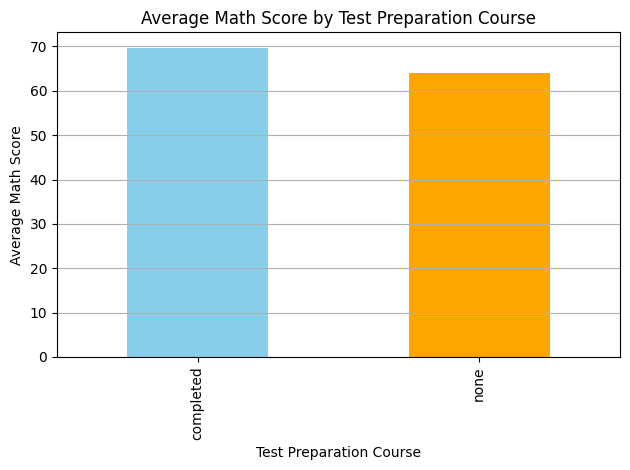

In [37]:
prep_course_avg.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Math Score by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Math Score')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
#Question-3

In [14]:
from scipy import linalg, optimize
import matplotlib.pyplot as plt

In [15]:
A = np.array([[3, 2], [4, -1]])   # Coefficient matrix
b = np.array([16, 9])            # Right-hand side constants


In [16]:
solution = linalg.solve(A, b)

In [17]:

print("Solution of the system of equations:")
print(f"x = {solution[0]:.4f}, y = {solution[1]:.4f}")


Solution of the system of equations:
x = 3.0909, y = 3.3636


In [18]:
f = lambda x: (x - 3)**2 + 2

In [19]:
result = optimize.minimize(f, x0=0)

In [20]:
print("\nMinimum of f(x) = (x - 3)^2 + 2")
print(f"Minimum at x = {result.x[0]:.4f}")
print(f"Minimum value = {f(result.x[0]):.4f}")


Minimum of f(x) = (x - 3)^2 + 2
Minimum at x = 3.0000
Minimum value = 2.0000


In [21]:
x_vals = np.linspace(-2, 8, 100)
y_vals = f(x_vals)


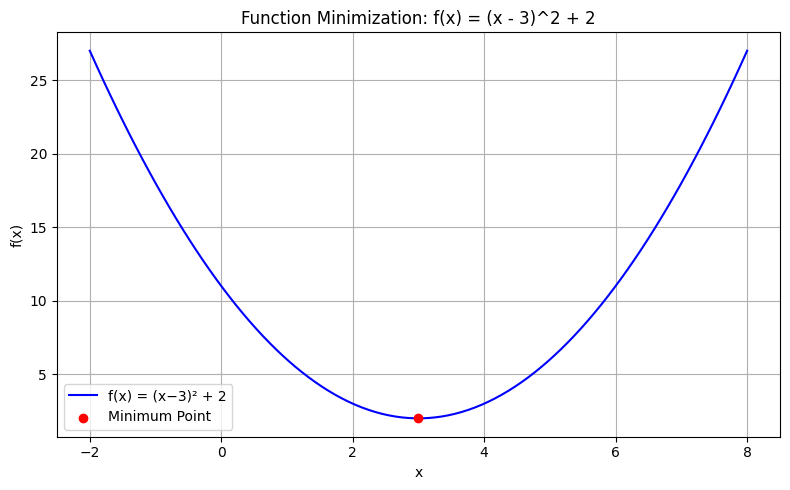

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="f(x) = (x−3)² + 2", color="blue")
plt.scatter(result.x, f(result.x), color="red", label="Minimum Point", zorder=5)
plt.title("Function Minimization: f(x) = (x - 3)^2 + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Question-4

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
iris = load_iris()
X = iris.data          # Features
y = iris.target        # Labels

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)


In [28]:
print("----- Logistic Regression -----")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

----- Logistic Regression -----
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("----- k-Nearest Neighbors (k=3) -----")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

----- k-Nearest Neighbors (k=3) -----
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

